<a href="https://colab.research.google.com/github/SyedHuzaifa007/Concrete-Strength-Prediction-Model/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [5]:
# Loading Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
# Checking For Null Values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Our Data Contains No Null Values

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
# Renaming Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [10]:
# Checking New DataFrame
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


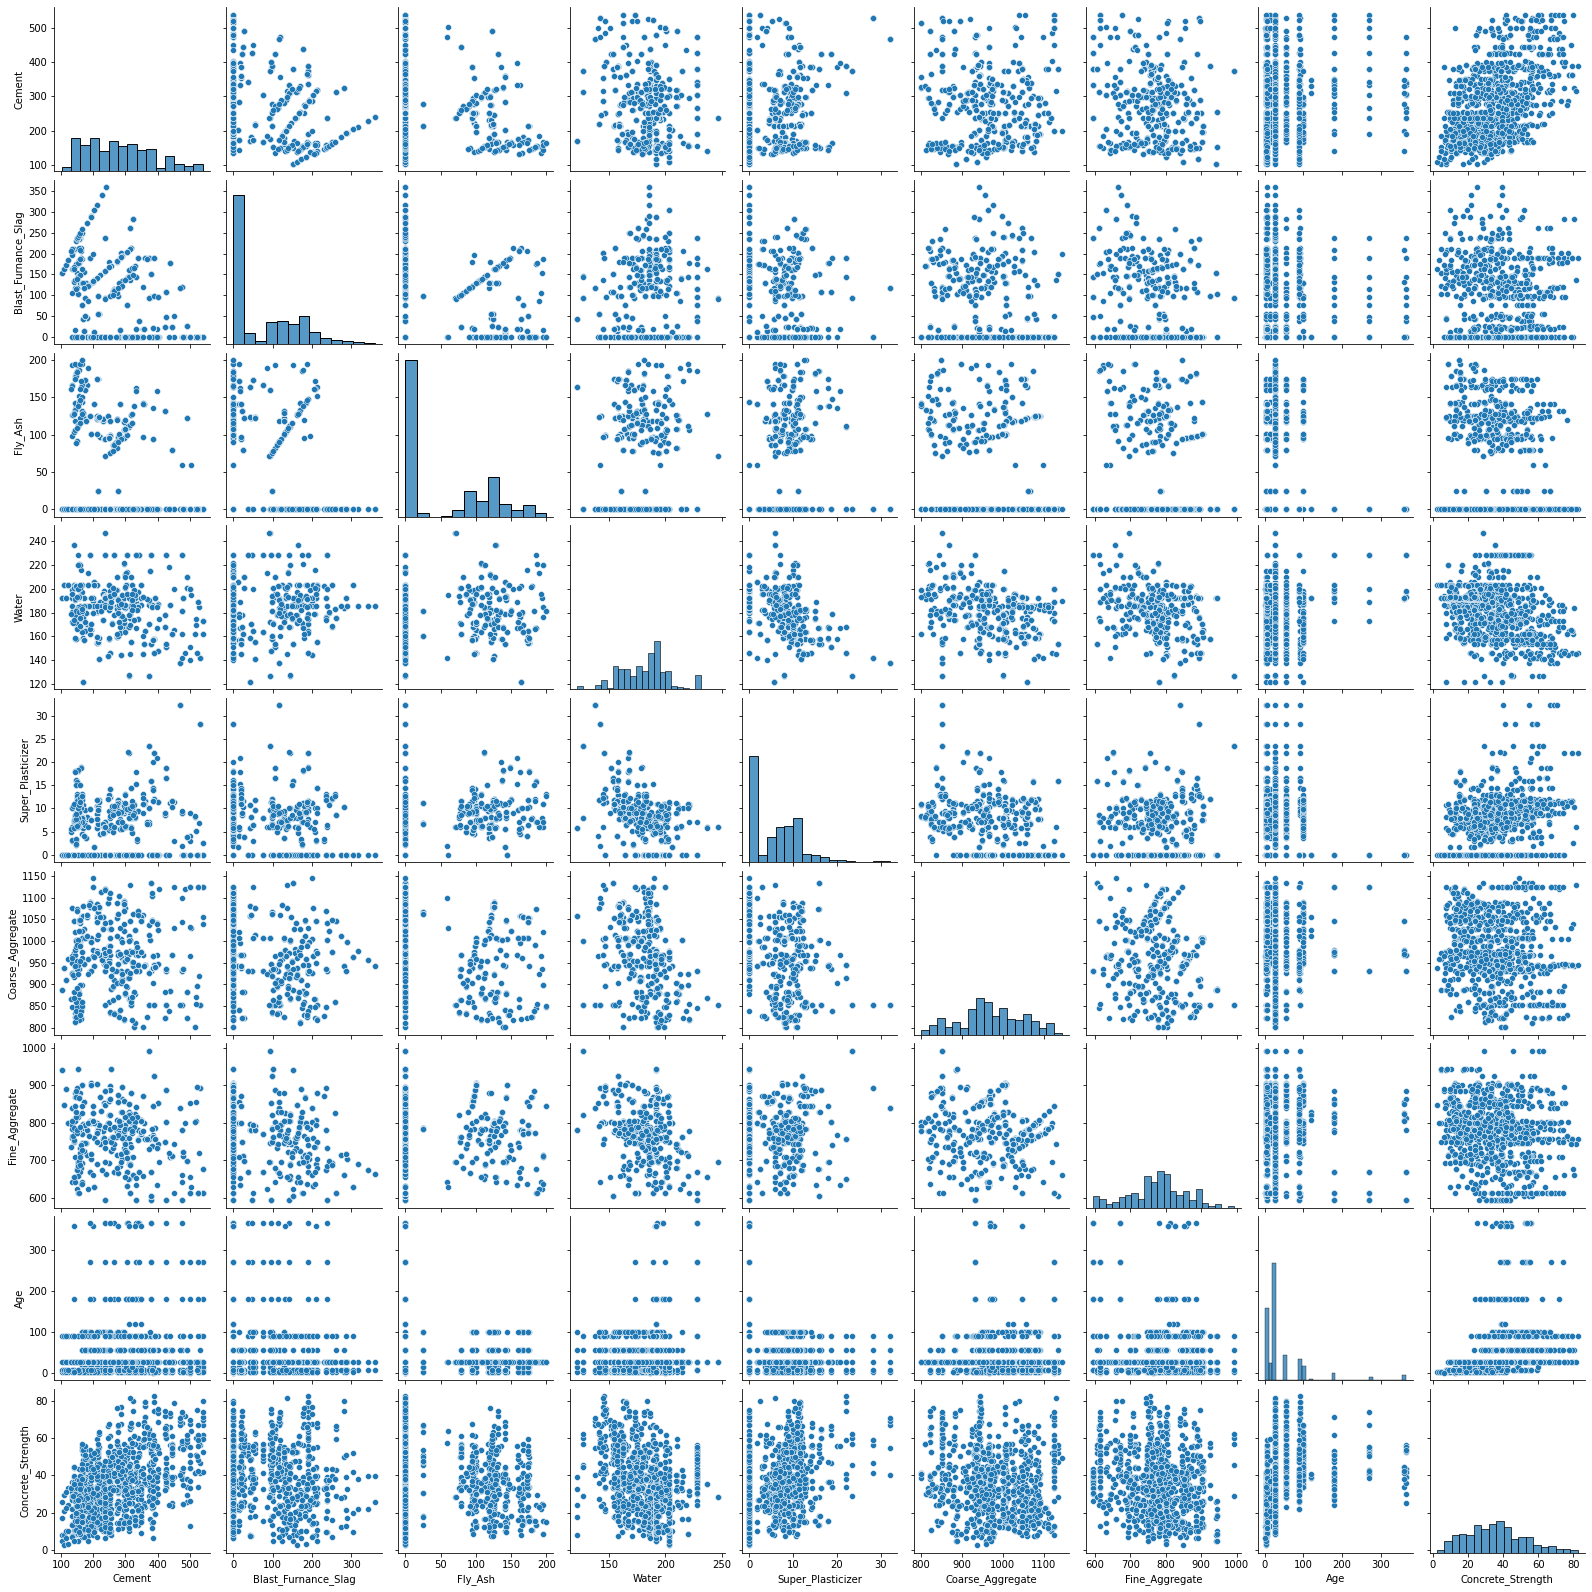

In [ ]:
# Plotting Relations Between Features
sns.pairplot(df)

In [13]:
# Shuffling Data
df.sample(frac=1)

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
878,133.0,210.0,0.0,196.0,3.0,949.0,795.0,28,31.03
131,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,28,52.20
815,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,3,33.80
445,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,56,36.56
775,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,22.44
...,...,...,...,...,...,...,...,...,...
232,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,56,50.77
340,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,14,36.99
697,108.3,162.4,0.0,203.5,0.0,938.2,849.0,7,7.72
712,192.0,288.0,0.0,192.0,0.0,929.8,716.1,7,21.48


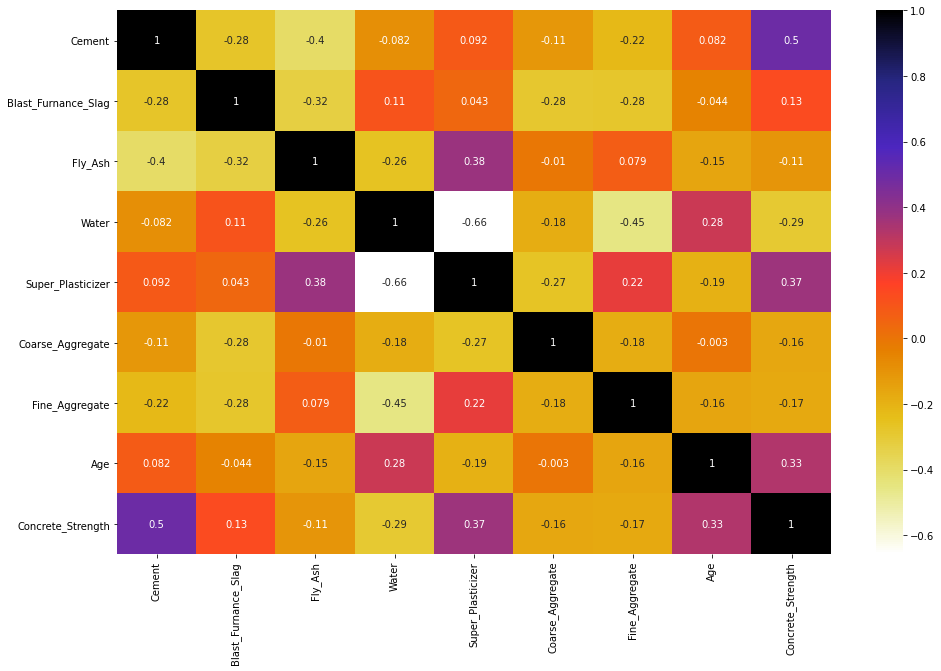

In [14]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

In [15]:
df.shape

(1030, 9)

In [16]:
# Splitting The Dataset Into Testing and Training Data
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
train_data.shape

(721, 9)

In [18]:
test_data = df.iloc[721:,:]
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
721,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,3,11.85
722,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,7,17.24
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
725,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,120,38.70


In [19]:
test_data.shape

(309, 9)

In [20]:
# Separating Features From Test And Train Data
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [21]:
train_labels.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete_Strength, dtype: float64

In [22]:
test_labels.head()

721    11.85
722    17.24
723    27.83
724    35.76
725    38.70
Name: Concrete_Strength, dtype: float64

In [23]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [24]:
# Checking Normalized Train Data
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.515653,-0.860901,-0.847434,-0.724746,-0.607016,0.863737,-1.268542,-0.306162
1,2.515653,-0.860901,-0.847434,-0.724746,-0.607016,1.075796,-1.268542,-0.306162
2,0.478112,0.769375,-0.847434,2.155139,-1.004555,-0.663089,-2.258142,3.267540
3,0.478112,0.769375,-0.847434,2.155139,-1.004555,-0.663089,-2.258142,4.670440
4,-0.836716,0.653825,-0.847434,0.584292,-1.004555,-0.007120,0.535666,4.596603


In [25]:
# Checking Normalized Test Data
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
721,0.257174,-0.860901,-0.847434,0.584292,-1.004555,0.467893,0.589973,-0.675346
722,0.257174,-0.860901,-0.847434,0.584292,-1.004555,0.467893,0.589973,-0.616276
723,0.257174,-0.860901,-0.847434,0.584292,-1.004555,0.467893,0.589973,-0.306162
724,0.257174,-0.860901,-0.847434,0.584292,-1.004555,0.467893,0.589973,0.609415
725,0.257174,-0.860901,-0.847434,0.584292,-1.004555,0.467893,0.589973,1.052436


In [26]:
# Making Model

model = Sequential()
# model.add(Dense(8, activation = 'relu'))
# model.add(Dense(6, activation = 'relu'))
# model.add(Dense(5))
model.add(Dense(5, activation='relu', input_shape = [len(train_data.keys())]))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Training Model on Training Data
history = model.fit(train_data, train_labels, epochs = 100)

Epoch 1/100
23/23 [==============================] - 3s 2ms/step - loss: 1668.7234 - mae: 36.5331
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 1550.8038 - mae: 35.4995
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 1566.0494 - mae: 35.7085
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 1596.1542 - mae: 36.1875
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 1464.2329 - mae: 34.3660
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 1558.1399 - mae: 35.5130
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 1419.7303 - mae: 33.8494
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 1463.6565 - mae: 34.3075
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 1462.2835 - mae: 34.4425
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 1387.3974 - mae: 33.1400
Epoch 11/100
23/23 

In [28]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mae,epochs
95,121.361588,8.856807,95
96,120.440956,8.816658,96
97,119.226021,8.764486,97
98,118.239815,8.721283,98
99,117.298271,8.682775,99


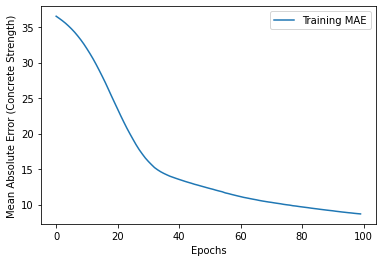

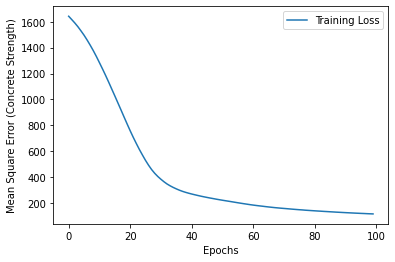

In [29]:
# plotting loss on validation data
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.legend()

history_plot(history)

In [30]:
# Making Predictions on Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()
print(predictions.shape)
print(test_labels.shape)

(309,)
(309,)


In [31]:
predictions

array([18.644794 , 19.097317 , 22.730919 , 28.557858 , 31.236862 ,
       20.61493  , 21.045948 , 24.644978 , 30.181591 , 32.860596 ,
       21.785976 , 22.213089 , 25.374493 , 30.99228  , 34.48177  ,
       14.34793  , 16.543095 , 18.012566 , 21.036037 , 20.224686 ,
       41.34351  , 46.880127 , 31.034378 , 17.257206 , 19.733482 ,
       37.706154 , 37.88026  , 38.228477 , 38.83786  , 40.056618 ,
       48.199276 , 49.013493 , 50.641926 , 57.853542 , 68.32202  ,
       78.7905   , 24.560715 , 24.98098  , 26.188225 , 28.68863  ,
       31.724838 , 39.761856 , 29.6734   , 29.851997 , 30.209198 ,
       30.834301 , 32.084503 , 39.700138 , 60.137    , 21.843468 ,
       22.662086 , 26.744091 , 29.738094 , 26.418507 , 19.630558 ,
       21.727459 , 25.928406 , 17.531738 , 21.118176 , 16.673153 ,
       17.140009 , 20.726448 , 27.82795  , 26.927223 , 23.354206 ,
       26.126507 , 31.66312  , 22.270576 , 25.628487 , 31.1651   ,
       41.41443  , 62.701973 , 20.724136 , 35.36246  , 62.4567

In [32]:
test_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 116.7886 - mae: 8.3787


In [33]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Mean Squared Error: 116.78858184814453
Mean Absolute Error: 8.378684043884277


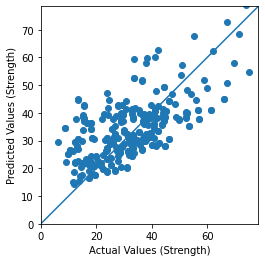

In [34]:
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Values (Strength)')
plt.ylabel('Predicted Values (Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

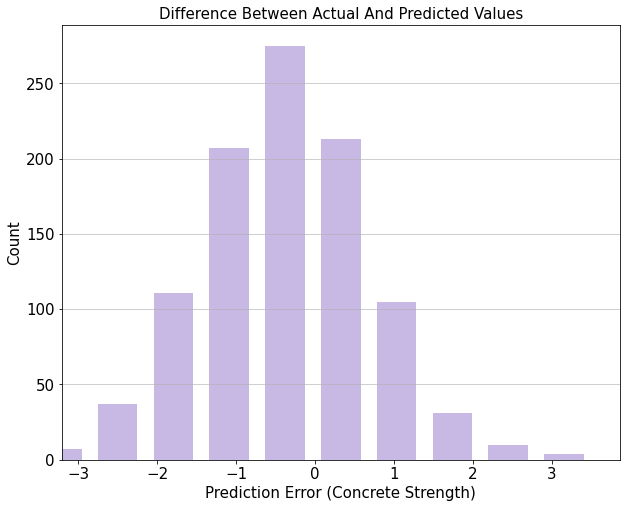

In [35]:
# Plotting Difference Between Actual Values And Predicted Values
error = predictions - test_labels
import random
np.random.seed(100)
error = np.random.normal(loc=0, scale=1, size=1000)
hist,bin_edges = np.histogram(error)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#b19cd9',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Prediction Error (Concrete Strength)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Difference Between Actual And Predicted Values',fontsize=15)
plt.show()

**Making Second Model For Validation Data**

In [36]:
#Making Second Model For Validation Data
model2 = model

In [37]:
history_1 = model2.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split=0.2)

In [38]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history.epoch
history_1_df.tail()

,loss,mae,val_loss,val_mae,epochs
95,66.252556,6.351605,39.009304,4.727398,95
96,65.895729,6.340374,38.097298,4.678121,96
97,65.811836,6.323271,38.127762,4.674993,97
98,65.550995,6.310102,38.346638,4.683397,98
99,65.230247,6.306627,37.831142,4.661203,99


In [39]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [40]:
predictions1.shape

(309,)

In [41]:
test1_score = model2.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 89.6244 - mae: 7.2106


In [43]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[1]}")

Loss: 89.62444305419922
Mean Absolute Error: 7.210556507110596


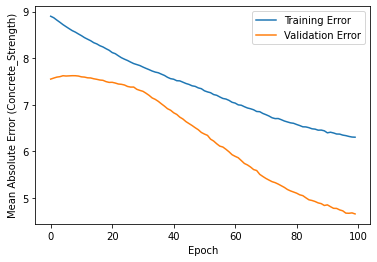

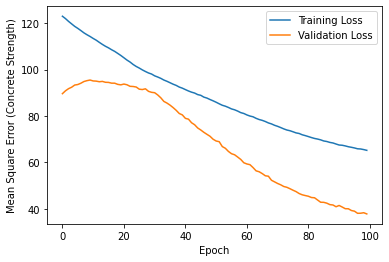

In [44]:
# Plotting Loss on Validation Data
def plot_history1(history_1):
  # Mean Absolute Error
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (Concrete_Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training Error')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation Error')
  plt.legend()
  # Mean Square Error
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_loss'], label = 'Validation Loss')
  plt.legend()

plot_history1(history_1)

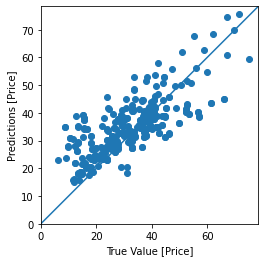

In [45]:
plt.scatter(test_labels, predictions1)
plt.xlabel('True Value [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

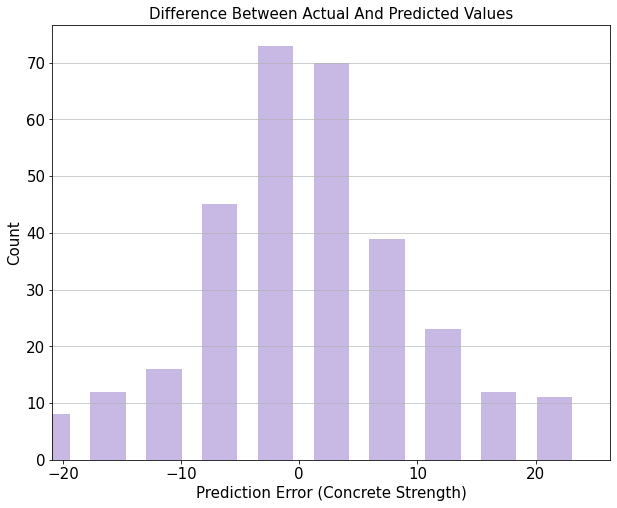

In [51]:
# Plotting Difference Between Actual Values And Predicted Values
error1 = predictions1 - test_labels
import random
np.random.seed(100)
error = np.random.normal(loc=0, scale=1, size=1000)
hist,bin_edges = np.histogram(error1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 3.0, color='#b19cd9',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Prediction Error (Concrete Strength)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Difference Between Actual And Predicted Values',fontsize=15)
plt.show()

Buliding Third Model For Overcoming Overfitting

In [52]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [53]:
# Building Third Model
model3 = model2

In [54]:
history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)

In [55]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mae,val_loss,val_mae,epochs
95,52.177994,5.685844,27.807501,4.165571,95
96,52.109940,5.696083,27.681593,4.164996,96
97,52.101357,5.692714,28.313503,4.199535,97
98,52.062347,5.685024,28.357792,4.200491,98
99,52.068913,5.689757,28.309874,4.196990,99


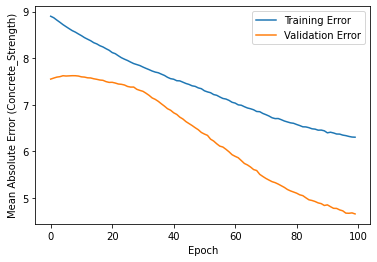

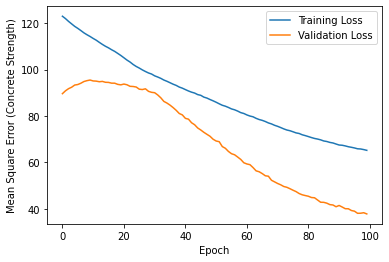

In [56]:
# Plotting Validation Loss After Overcoming Overfitting
plot_history1(history_2_df)

In [57]:
predictions3 = model3.predict(test_data).ravel()
predictions3

array([13.609311, 16.286993, 30.344835, 39.220787, 40.003044, 16.873404,
       19.551092, 33.608932, 42.25256 , 43.034817, 20.630983, 23.30867 ,
       37.366516, 45.74133 , 46.52359 , 14.972869, 28.74494 , 17.821672,
       31.59374 , 15.936522, 45.546764, 54.207905, 41.15517 , 17.450304,
       31.173023, 36.258533, 37.597378, 40.275066, 44.96101 , 54.332905,
       48.56356 , 53.249516, 62.621407, 74.317894, 76.66466 , 79.01143 ,
       17.514912, 22.199085, 31.567438, 37.973217, 38.85117 , 41.17515 ,
       18.308292, 19.647131, 22.324816, 27.01076 , 36.38266 , 42.528027,
       47.175995, 20.03431 , 14.59793 , 25.621237, 39.679077, 30.638355,
       31.222372, 21.625418, 35.68326 , 16.536194, 30.308264, 28.640001,
       17.934172, 31.70624 , 40.337376, 11.935224, 17.2746  , 31.327124,
       40.204044, 22.711998, 36.76984 , 45.243885, 47.59065 , 52.28419 ,
       18.19697 , 37.21875 , 70.130196, 61.495716, 63.842487, 66.18925 ,
       45.885876, 15.559641, 29.33171 , 35.18471 , 

In [58]:
test2_score  = model3.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 125.6428 - mae: 8.4871


In [59]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[1]}")

Loss: 125.64278411865234
Mean Absolute Error: 8.48709774017334


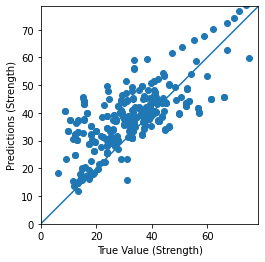

In [60]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Strength)')
plt.ylabel('Predictions (Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

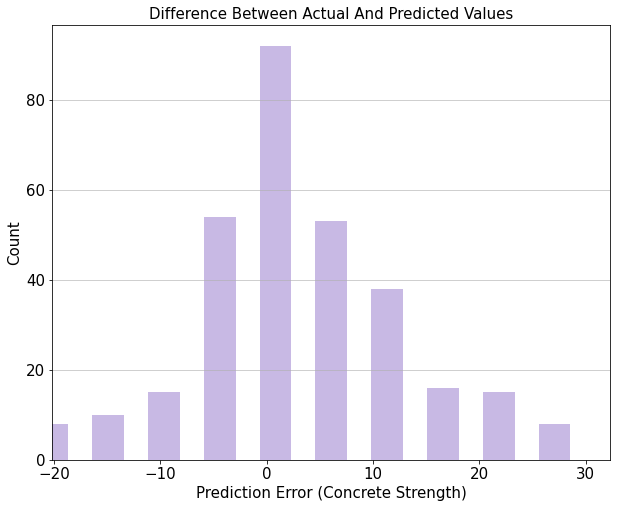

In [65]:
# Plotting Difference Between Actual Values And Predicted Values
error2 = predictions3 - test_labels
import random
np.random.seed(100)
error = np.random.normal(loc=0, scale=1, size=1000)
hist,bin_edges = np.histogram(error2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 3.0, color='#b19cd9',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Prediction Error (Concrete Strength)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Difference Between Actual And Predicted Values',fontsize=15)
plt.show()

Final Loss: 125.642 <br>
Final Mean Absolute Error: 8.487

In [66]:
# Saving Appropriate Model
model3.save('ConcreteStrengthModel.h5')

In [67]:
# Saving Model In CSV File
df.to_csv('Concrete_Strength_Assignment.csv', index=False)
print("Your File Was Saved Successfully!")

Your File Was Saved Successfully!
